In [93]:
from adversarial_utils import * 

# Importing data

In [94]:
train_images,y_train,train_labels,test_images,y_test,test_labels = load_CIFAR10_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
y_test.shape

(10000, 10)

# Defining a model for cifar classification

In [95]:
## classification model for cifar10
def build_model_CNN(input_shape,optimizer):
  input = Input(shape=input_shape)
  weight_decay = 1e-4
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay), padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2),padding='same'))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay), padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2),padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay), padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2),padding='same'))
  
  model.add(AveragePooling2D((3, 3),padding='same'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  # compile model
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [3]:
model =  keras.models.load_model('cifar10.h5')

In [5]:
score = model.evaluate(train_images, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1],"\n")
score = model.evaluate(test_images, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.6319649815559387
Train accuracy: 0.9106199741363525 

Test loss: 0.867785632610321
Test accuracy: 0.8151999711990356


# Adversarial attacks

## FGSM

Testing the FGSM attack on the test set with different epsilons

In [ ]:
signed_grad_FGSM = signed_gradient(model,test_images,y_test)
eps = [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]    # Epsilon < (8/256) = 0.03125
loss_FGSM = []
score_FGSM = []
for i in range(len(eps)):
  disturbed_images = test_images + eps[i]*signed_grad_FGSM
  tmp = model.evaluate(disturbed_images, y_test, verbose=0)
  loss_FGSM.append(tmp[0])
  score_FGSM.append(tmp[1])

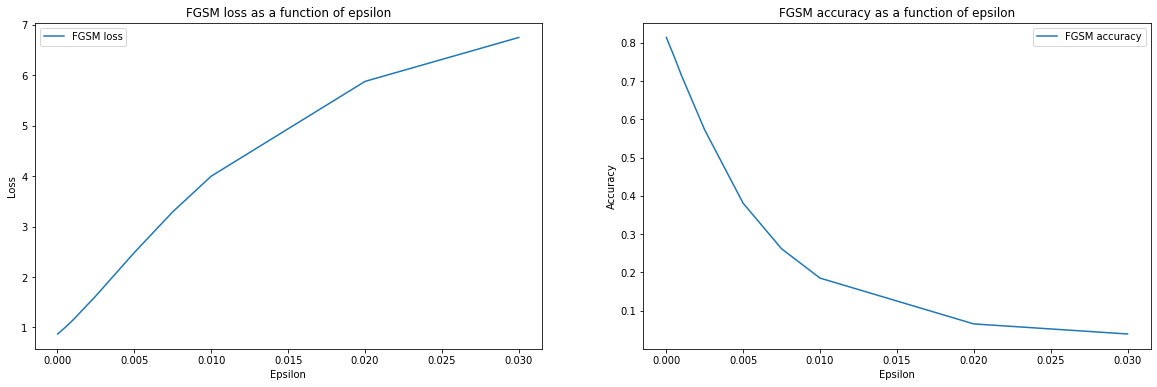

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(eps,loss_FGSM,label='FGSM loss')
plt.plot
plt.title('FGSM loss as a function of epsilon')
plt.ylabel('Loss')
plt.xlabel('Epsilon')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(eps,score_FGSM,label='FGSM accuracy')
plt.title('FGSM accuracy as a function of epsilon')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()

### Example of an image well predicted by the model

In [ ]:
#Choosing a well predicted image
image_index = 0
image = tf.convert_to_tensor(test_images[image_index].reshape(1,32,32,3),dtype=tf.float32)
predic = model.predict(image)
print("Original label : ",test_labels[image_index][0],"\n"+"Predicted label : ",np.argmax(predic))

Original label :  3 
Predicted label :  3


In [ ]:
#computing the signed gradient of the chosen image

signed_grad_image = signed_grad_wrt_one_image(model,image,y_test[image_index])

FGSM attack on the chosen image

In [ ]:
# Small Epsilon
eps = 0.0001
perturbed_image = eps*signed_grad_image+image
predic = model.predict(perturbed_image)
print("Original label : ",test_labels[image_index][0],"\n"+"New Label after perturbation : ",np.argmax(predic))

Original label :  3 
New Label after perturbation :  3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'perturbed image')

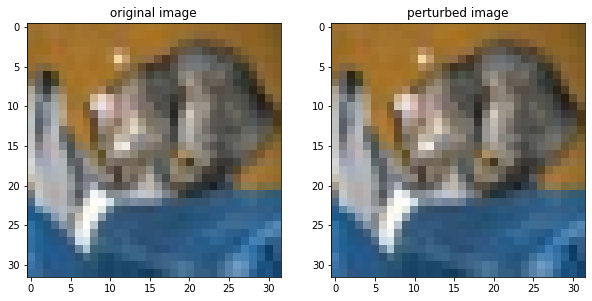

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(test_images[image_index])
plt.title("original image")
plt.subplot(122)
plt.imshow(tf.reshape(perturbed_image,(32,32,3)))
plt.title("perturbed image")

In [ ]:
# Good Epsilon
eps = 0.001
perturbed_image = eps*signed_grad_image+image
predic = model.predict(perturbed_image)
print("Original label : ",test_labels[image_index][0],"\n"+"New Label after perturbation : ",np.argmax(predic))

Original label :  3 
New Label after perturbation :  5


In [ ]:
model.predict(perturbed_image)

array([[0.00657544, 0.00161925, 0.00474283, 0.4757881 , 0.00127997,
        0.4801851 , 0.01912827, 0.00370927, 0.00438174, 0.00259007]],
      dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'perturbed image')

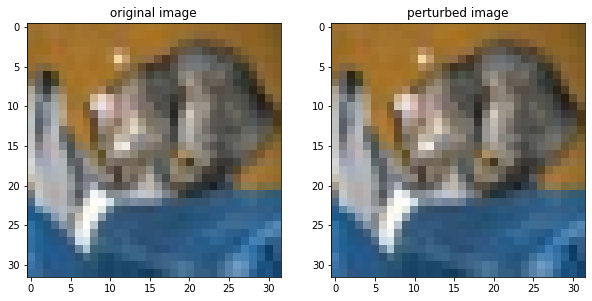

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(test_images[image_index])
plt.title("original image")
plt.subplot(122)
plt.imshow(tf.reshape(perturbed_image,(32,32,3)))
plt.title("perturbed image")

In [ ]:
# Big Epsilon
eps = 0.01
perturbed_image = eps*signed_grad_image+image
predic = model.predict(perturbed_image)
print("Original label : ",test_labels[image_index][0],"\n"+"New Label after perturbation : ",np.argmax(predic))

Original label :  3 
New Label after perturbation :  5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'perturbed image')

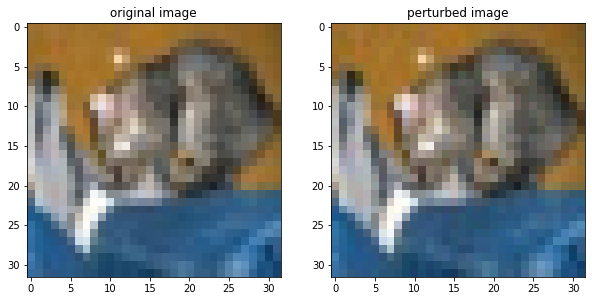

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(test_images[image_index])
plt.title("original image")
plt.subplot(122)
plt.imshow(tf.reshape(perturbed_image,(32,32,3)))
plt.title("perturbed image")

In [ ]:
# Biggest Epsilon possible for cifar10
eps = 0.031
perturbed_image = eps*signed_grad_image+image
predic = model.predict(perturbed_image)
print("Original label : ",test_labels[image_index][0],"\n"+"New Label after perturbation : ",np.argmax(predic))

Original label :  3 
New Label after perturbation :  5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'perturbed image')

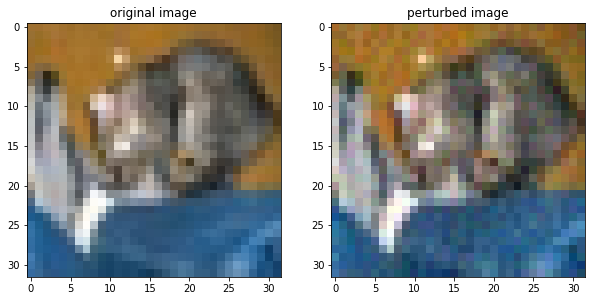

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(test_images[image_index])
plt.title("original image")
plt.subplot(122)
plt.imshow(tf.reshape(perturbed_image,(32,32,3)))
plt.title("perturbed image")

## PGD

In [ ]:
images = tf.convert_to_tensor(test_images,dtype=tf.float32)

eta = [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]
loss_PGD = []
score_PGD = []
for i in range(len(eps)):
  disturbed_images = PGD_attack(model=model,data = test_images,iterations = 5,eta = eta[i],epsilon = 0.031,labels=y_test) #epsilon = 0.031 ~ 8/256
  tmp = model.evaluate(disturbed_images, y_test, verbose=0)
  loss_PGD.append(tmp[0])
  score_PGD.append(tmp[1])

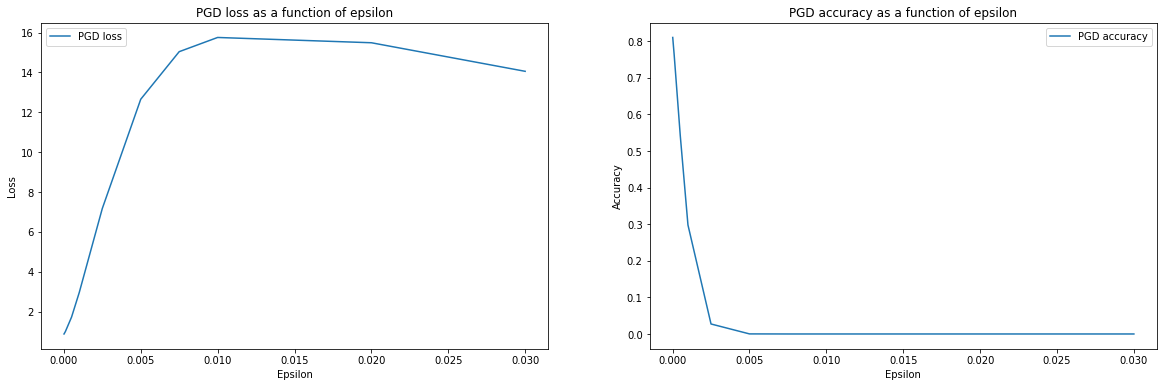

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(eta,loss_PGD,label='PGD loss')
plt.plot
plt.title('PGD loss as a function of epsilon')
plt.ylabel('Loss')
plt.xlabel('Epsilon')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(eta,score_PGD,label='PGD accuracy')
plt.title('PGD accuracy as a function of epsilon')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()

###PGD on one image

#### choosing a well classified image

In [ ]:
#Choosing a well predicted image
image_index = 0
image = tf.convert_to_tensor(test_images[image_index].reshape(1,32,32,3),dtype=tf.float32)
predic = model.predict(image)
print("Original label : ",test_labels[image_index][0],"\n"+"Predicted label : ",np.argmax(predic))

Original label :  3 
Predicted label :  3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


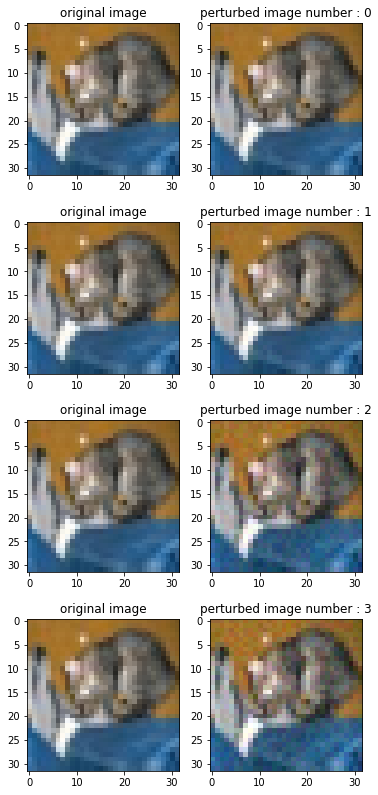

In [ ]:
eta = [0.0001,0.001,0.05,0.25] #4 different eps

modified_images = []

fig, axs = plt.subplots(len(eta), 2,figsize=(6,3.5*len(eta) ))
axs = axs.ravel()

for i in range(len(eta)):

  modified_images.append(PGD_attack(model,image,iterations = 10,eta = eta[i],epsilon = 0.031,labels=y_test[image_index]))
  axs[2*i].imshow(test_images[image_index])
  axs[2*i].title.set_text("original image")
  axs[2*i+1].imshow(tf.reshape(modified_images[i],(32,32,3)))
  axs[2*i+1].title.set_text("perturbed image number : " + str(i) )


## Comparaison


In [8]:
eps =  [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03] # Epsilon < (8/256) = 0.03125
loss = []
score = []
error_rate=[]
for i in range(len(eps)):
  signed_grad_FGSM = signed_gradient(model,test_images,y_test)
  disturbed_images = test_images + eps[i]*signed_grad_FGSM
  tmp = model.evaluate(disturbed_images, y_test, verbose=0)
  loss.append(tmp[0])
  score.append(tmp[1])
  error_rate.append(1-tmp[1])

loss_pgd4 = []
score_pgd4 = []
error_pgd4 = []

loss_pgd2 = []
score_pgd2 = []
error_pgd2 = []

loss_pgd3 = []
score_pgd3 = []
error_pgd3 = []
for i in range(len(eps)):
  disturbed_images = PGD_attack(model=model,data = test_images,iterations = 3,eta = eps[i],epsilon = 0.031,labels=y_test) #eta = 0.031 ~ 8/256
  tmp2 = model.evaluate(disturbed_images, y_test, verbose=0)
  loss_pgd2.append(tmp2[0])
  score_pgd2.append(tmp2[1])
  error_pgd2.append(1-tmp2[1])  

for i in range(len(eps)):
  disturbed_images = PGD_attack(model=model,data = test_images,iterations = 4,eta = eps[i],epsilon = 0.031,labels=y_test) #eta = 0.031 ~ 8/256
  tmp_pgd3 = model.evaluate(disturbed_images, y_test, verbose=0)
  loss_pgd3.append(tmp_pgd3[0])
  score_pgd3.append(tmp_pgd3[1])
  error_pgd3.append(1-tmp_pgd3[1])  
for i in range(len(eps)):
  disturbed_images = PGD_attack(model=model,data = test_images,iterations = 5,eta = eps[i],epsilon = 0.031,labels=y_test) #eta = 0.031 ~ 8/256
  tmp_pgd4 = model.evaluate(disturbed_images, y_test, verbose=0)
  loss_pgd4.append(tmp_pgd4[0])
  score_pgd4.append(tmp_pgd4[1])
  error_pgd4.append(1-tmp_pgd4[1])  



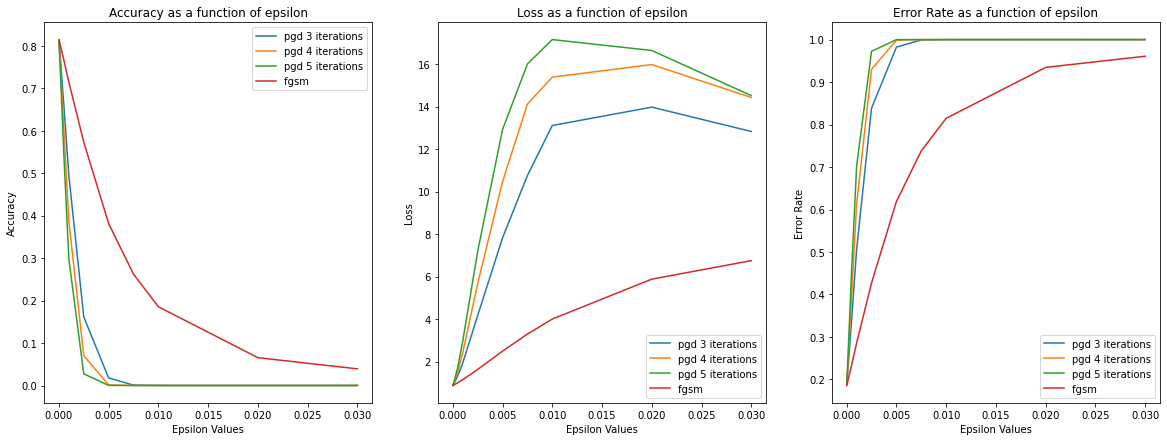

In [10]:
plt.figure(figsize=(20,7))
plt.subplot(131)
#plt.xscale('log')
plt.plot(eps,score_pgd2,label='pgd 3 iterations')
plt.plot(eps,score_pgd3,label='pgd 4 iterations')
plt.plot(eps,score_pgd4,label='pgd 5 iterations')
plt.plot(eps,score,label='fgsm ')
plt.xlabel('Epsilon Values')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of epsilon')

plt.subplot(132)
#plt.xscale('log')
plt.plot(eps,loss_pgd2,label='pgd 3 iterations')
plt.plot(eps,loss_pgd3,label='pgd 4 iterations')
plt.plot(eps,loss_pgd4,label='pgd 5 iterations')
plt.plot(eps,loss,label='fgsm ')
plt.xlabel('Epsilon Values')
plt.legend()
plt.ylabel('Loss')
plt.title('Loss as a function of epsilon')

plt.subplot(133)
#plt.xscale('log')
plt.plot(eps,error_pgd2,label='pgd 3 iterations')
plt.plot(eps,error_pgd3,label='pgd 4 iterations')
plt.plot(eps,error_pgd4,label='pgd 5 iterations')
plt.plot(eps,error_rate,label='fgsm ')
plt.xlabel('Epsilon Values')
plt.legend()
plt.ylabel('Error Rate')
plt.title('Error Rate as a function of epsilon')
plt.show()

# Adversarial Training

Use the function adversarial_set() in the adversarial_utils.py in order to create an adversarial set using FGSM or PGD. (it can be a set with only adversarial example or a mix of both adversarial and normal examples) \\
**Fix the percentage of adversarial parameter** to specify the amount of adversarial examples to have in the output

### Generating adversarial sets

In [11]:
# Setting eta and iterations to 0 because they are not used in the FGSM 
x_FGSM_adversarial, y_FGSM_adversarial = adversarial_set(model,train_images[:10000],y_train[:10000],1.0
                                                         ,'FGSM',epsilon = 0.001,eta=0,iterations=0) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'perturbed image')

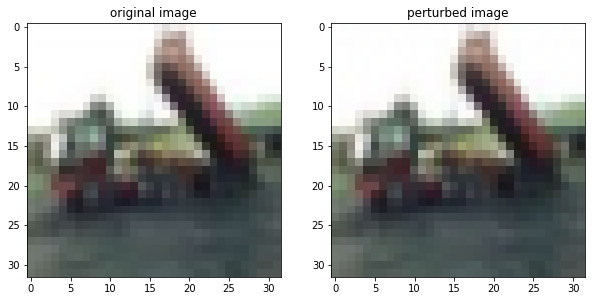

In [12]:
index = 2
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(train_images[index])
plt.title("original image")
plt.subplot(122)
plt.imshow(x_FGSM_adversarial[index])
plt.title("perturbed image")

In [13]:
train_images.shape

(50000, 32, 32, 3)

### Adversarial training

In [55]:
model =  keras.models.load_model('cifar10.h5')
# hyperparameter
opt = optimizers.Adam(lr=0.0009)
batch_size = 64
epoch = 30
alpha = 0.5
epsilon_fgsm = 0.025
perf_dict = {}
perf_dict['loss'] = []
perf_dict['val_loss'] = []
perf_dict['original_output_loss'] = []
perf_dict['val_original_output_loss'] = []
perf_dict['adversarial_output_loss'] = []
perf_dict['val_adversarial_output_loss'] = []
perf_dict['original_output_accuracy'] = []
perf_dict['val_original_output_accuracy'] = []
perf_dict['adversarial_output_accuracy'] = []
perf_dict['val_adversarial_output_accuracy'] = []


x_adversarial = train_images.copy()
for i in range(5):
  x_adversarial[10000*i:10000*(i+1),:,:,:],_ = adversarial_set(model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)


#model fitting
input_shape = train_images.shape[1:]
adv_model = build_model_CNN_2(input_shape)



for i in range(1,epoch+1):
  print("epoch = ",i)
  if i > 1 :
    for i in range(5):
      x_adversarial[10000*i:10000*(i+1),:,:,:],_ = adversarial_set(adv_model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                                  ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)

  branch1 = Input(input_shape)
  branch2 = Input(input_shape)

  normal_y = adv_model(branch1)
  normal_y = Lambda(lambda x: x, name='original_output')(normal_y)
  adv_y = adv_model(branch2)
  adv_y = Lambda(lambda x: x, name='adversarial_output')(adv_y)

  double_branch_net = Model([branch1,branch2],[normal_y,adv_y])

  # compile model
  double_branch_net.compile(optimizer=opt, loss={'original_output' : 'categorical_crossentropy', 'adversarial_output' : 'categorical_crossentropy'},
              loss_weights=[{'original_output' : alpha, 'adversarial_output' : 1-alpha}],
              metrics={'original_output' : 'accuracy', 'adversarial_output' : 'accuracy'},)
  history = double_branch_net.fit([train_images,x_adversarial], [y_train,y_train], epochs=1, batch_size=batch_size,verbose=1,validation_split=0.1)
  for i in perf_dict.keys():
    perf_dict[i].append(history.history[i][0])

epoch =  1
704/704 [==============================] - 7s 9ms/step - loss: 2.0326 - original_output_loss: 1.9575 - adversarial_output_loss: 1.9930 - original_output_accuracy: 0.3219 - adversarial_output_accuracy: 0.3067 - val_loss: 1.3616 - val_original_output_loss: 1.2401 - val_adversarial_output_loss: 1.3690 - val_original_output_accuracy: 0.5572 - val_adversarial_output_accuracy: 0.5012
epoch =  2
704/704 [==============================] - 8s 9ms/step - loss: 1.7348 - original_output_loss: 1.4516 - adversarial_output_loss: 1.9046 - original_output_accuracy: 0.4736 - adversarial_output_accuracy: 0.3106 - val_loss: 1.3188 - val_original_output_loss: 1.1492 - val_adversarial_output_loss: 1.3755 - val_original_output_accuracy: 0.5908 - val_adversarial_output_accuracy: 0.4906
epoch =  3
704/704 [==============================] - 8s 9ms/step - loss: 1.6394 - original_output_loss: 1.3312 - adversarial_output_loss: 1.8353 - original_output_accuracy: 0.5241 - adversarial_output_accuracy: 0.32

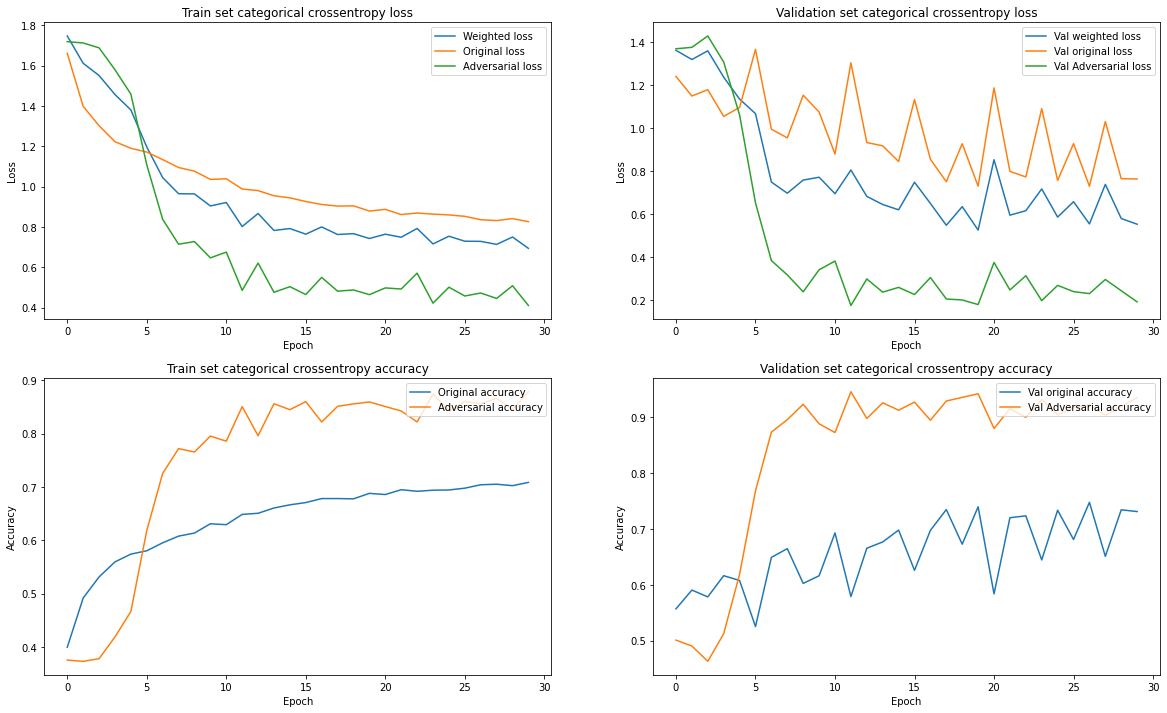

In [57]:
print_perfdict_adversarial_training(perf_dict)

In [ ]:
signed_grad_FGSM = []
signed_grad_FGSM = signed_gradient(adv_model,test_images,y_test)
eps = [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]      # Epsilon < (8/256) = 0.03125
loss_FGSM = []
score_FGSM = []
for i in range(len(eps)):
  disturbed_images = test_images + eps[i]*signed_grad_FGSM
  #for i in range(5):
  #  y_pred[10000*i:10000*(i+1)] = adv_model(train_images[10000*i:10000*(i+1)])
  y_pred = adv_model(disturbed_images)
  score_FGSM.append(np.array(categorical_accuracy(y_pred,y_test)*100))
  loss_FGSM.append(np.array(loss(y_pred,y_test)))

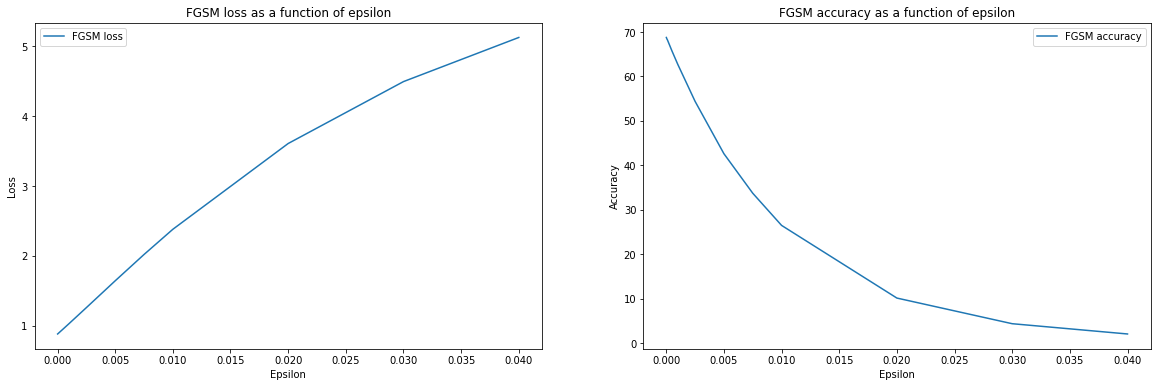

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(eps,loss_FGSM,label='FGSM loss')
plt.plot
plt.title('FGSM loss as a function of epsilon')
plt.ylabel('Loss')
plt.xlabel('Epsilon')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(eps,score_FGSM,label='FGSM accuracy')
plt.title('FGSM accuracy as a function of epsilon')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()

In [96]:
model =  keras.models.load_model('cifar10.h5')
# hyperparameter
opt = optimizers.RMSprop(lr=0.0009)
batch_size = 128
epoch = 30
alpha = K.variable(0.15)
epsilon = 0.031
eta = 0.003
iterations = 4

perf_dict = {}
perf_dict['loss'] = []
perf_dict['val_loss'] = []
perf_dict['original_output_loss'] = []
perf_dict['val_original_output_loss'] = []
perf_dict['adversarial_output_loss'] = []
perf_dict['val_adversarial_output_loss'] = []
perf_dict['original_output_accuracy'] = []
perf_dict['val_original_output_accuracy'] = []
perf_dict['adversarial_output_accuracy'] = []
perf_dict['val_adversarial_output_accuracy'] = []


x_adversarial_pgd = train_images.copy()
for i in range(5):
  x_adversarial_pgd[10000*i:10000*(i+1),:,:,:],_ = adversarial_set(model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)

#model fitting
input_shape = train_images.shape[1:]
adv_model_pgd = build_model_CNN_2(input_shape)



for i in range(1,epoch+1):
  print("epoch = ",i)
  if i > 1 :
    for i in range(5):
      x_adversarial_pgd[10000*i:10000*(i+1),:,:,:],_ = adversarial_set(adv_model_pgd,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                                  ,1,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)

  branch1 = Input(input_shape)
  branch2 = Input(input_shape)

  normal_y = adv_model_pgd(branch1)
  normal_y = Lambda(lambda x: x, name='original_output')(normal_y)
  adv_y = adv_model_pgd(branch2)
  adv_y = Lambda(lambda x: x, name='adversarial_output')(adv_y)

  double_branch_net_pgd = Model([branch1,branch2],[normal_y,adv_y])

  # compile model
  double_branch_net_pgd.compile(optimizer=opt, loss={'original_output' : 'categorical_crossentropy', 'adversarial_output' : 'categorical_crossentropy'},
              loss_weights={'original_output' : alpha, 'adversarial_output' : 1.0-alpha},
              metrics={'original_output' : 'accuracy', 'adversarial_output' : 'accuracy'},)


  history = double_branch_net_pgd.fit([train_images,x_adversarial_pgd], [y_train,y_train], epochs=1, batch_size=batch_size,verbose=1,validation_split=0.1)
  for i in perf_dict.keys():
    perf_dict[i].append(history.history[i][0])

epoch =  1
352/352 [==============================] - 6s 14ms/step - loss: 2.1416 - original_output_loss: 2.0661 - adversarial_output_loss: 2.0876 - original_output_accuracy: 0.3038 - adversarial_output_accuracy: 0.2962 - val_loss: 1.4756 - val_original_output_loss: 1.3843 - val_adversarial_output_loss: 1.4250 - val_original_output_accuracy: 0.5024 - val_adversarial_output_accuracy: 0.4844
epoch =  2
352/352 [==============================] - 6s 14ms/step - loss: 1.7744 - original_output_loss: 1.5134 - adversarial_output_loss: 1.7542 - original_output_accuracy: 0.4476 - adversarial_output_accuracy: 0.3561 - val_loss: 1.4856 - val_original_output_loss: 1.3254 - val_adversarial_output_loss: 1.4484 - val_original_output_accuracy: 0.5100 - val_adversarial_output_accuracy: 0.4630
epoch =  3
352/352 [==============================] - 7s 15ms/step - loss: 1.6597 - original_output_loss: 1.3835 - adversarial_output_loss: 1.6435 - original_output_accuracy: 0.4972 - adversarial_output_accuracy: 0

In [90]:
perf_dict.keys()

dict_keys(['loss', 'val_loss', 'original_output_loss', 'val_original_output_loss', 'adversarial_output_loss', 'val_adversarial_output_loss', 'original_output_accuracy', 'val_original_output_accuracy', 'adversarial_output_accuracy', 'val_adversarial_output_accuracy'])

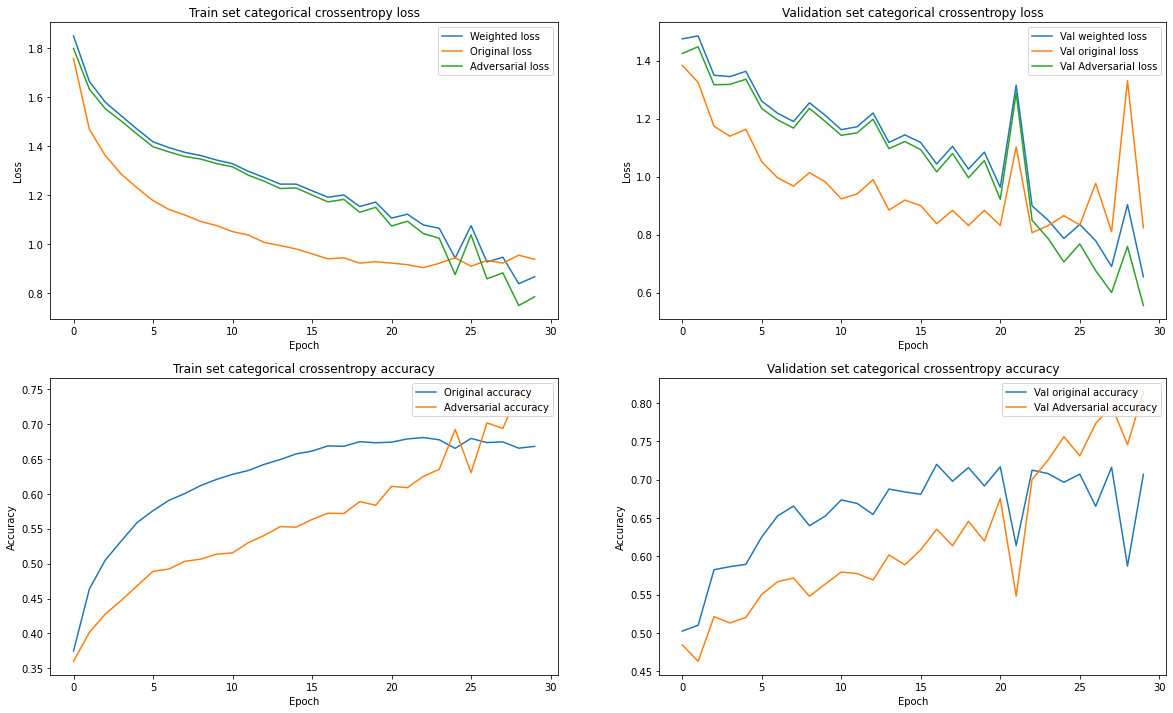

In [97]:
print_perfdict_adversarial_training(perf_dict)

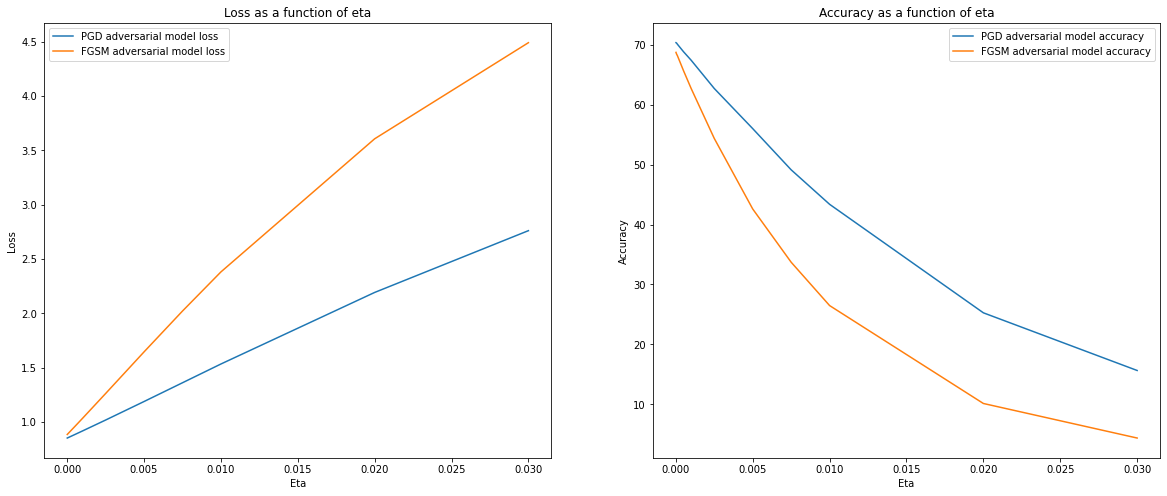

In [ ]:
signed_grad_FGSM = []
signed_grad_FGSM = signed_gradient(adv_model_pgd,test_images,y_test)
eps = [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]    # Epsilon < (8/256) = 0.03125
loss_FGSM_pgd = []
score_FGSM_pgd = []
for i in range(len(eps)):
  disturbed_images = test_images + eps[i]*signed_grad_FGSM
  #for i in range(5):
  #  y_pred[10000*i:10000*(i+1)] = adv_model(train_images[10000*i:10000*(i+1)])
  y_pred = adv_model_pgd(disturbed_images)
  score_FGSM_pgd.append(np.array(categorical_accuracy(y_pred,y_test)*100))
  loss_FGSM_pgd.append(np.array(loss(y_pred,y_test)))

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(eps,loss_FGSM_pgd,label='PGD adversarial model loss')
plt.plot(eps,loss_FGSM,label='FGSM adversarial model loss')
plt.title('Loss as a function of eta')
plt.ylabel('Loss')
plt.xlabel('Eta')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(eps,score_FGSM_pgd,label='PGD adversarial model accuracy')
plt.plot(eps,score_FGSM,label='FGSM adversarial model accuracy')
plt.title('Accuracy as a function of eta')
plt.ylabel('Accuracy')
plt.xlabel('Eta')
plt.legend(loc='upper right')
plt.show()

### Train scores

#### Adversarial Model

In [ ]:
#adv_model_pgd.save_weights('pgd_adversarial_weights.h5')
#adv_model.save_weights('fgsm_adversarial_weights.h5')

#model.load_weights('my_model_weights.h5')

In [ ]:
#hyperparameters
epsilon = 0.031
eta = 0.005
iterations = 5
epsilon_fgsm = 0.025

input_shape = train_images.shape[1:]
input = Input(shape=input_shape)
adv_model_pgd = build_model_CNN_2(input_shape)
model = Model(inputs=input,outputs=adv_model_pgd(input))
adv_model_pgd.load_weights('pgd_adversarial_weights.h5')

input = Input(shape=input_shape)
adv_model = build_model_CNN_2(input_shape)
model = Model(inputs=input,outputs=adv_model(input))
adv_model.load_weights('fgsm_adversarial_weights.h5')

In [ ]:
y_pred = np.zeros((50000,10))
print("PGD adversarial training model")
for i in range(5):
  y_pred[10000*i:10000*(i+1)] = adv_model_pgd(train_images[10000*i:10000*(i+1)])
print("Train Accuracy for pgd = %s %%" % np.array(categorical_accuracy(y_pred,y_train)*100))
print("Train Loss for pgd = ", np.array(loss(y_pred,y_train)))

print("FGSM adversarial training model")
for i in range(5):
  y_pred[10000*i:10000*(i+1)] = adv_model(train_images[10000*i:10000*(i+1)])
print("Train Accuracy for fgsm = %s %%" % np.array(categorical_accuracy(y_pred,y_train)*100))
print("Train Loss for fgsm = ", np.array(loss(y_pred,y_train)))

PGD adversarial training model
Train Accuracy for pgd = 74.36599731445312 %
Train Loss for pgd =  0.7587739038227193
FGSM adversarial training model
Train Accuracy for fgsm = 71.42599821090698 %
Train Loss for fgsm =  0.7992123391577571


In [ ]:
x_adversarial = np.zeros(train_images[:10000].shape)
y_pred = np.zeros((50000,10))
print(" PGD adversarial training model")
for i in range(5):
  x_adversarial,_ = adversarial_set(adv_model_pgd,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)
  y_pred[10000*i:10000*(i+1)] = adv_model_pgd(x_adversarial)
print("Train Accuracy with PGD attack = %s %%" % np.array(categorical_accuracy(y_pred,y_train)*100))
print("Train Loss with PGD attack = ", np.array(loss(y_pred,y_train)))
x_adversarial = np.zeros(train_images[:10000].shape)
y_pred = np.zeros((50000,10))
print("\n FGSM adversarial training model")
for i in range(5):
  x_adversarial,_ = adversarial_set(adv_model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)
  y_pred[10000*i:10000*(i+1)] = adv_model(x_adversarial)
print("Train Accuracy with PGD attack = %s %%" % np.array(categorical_accuracy(y_pred,y_train)*100))
print("Train Loss with PGD attack = ", np.array(loss(y_pred,y_train)))

x_adversarial = np.zeros(train_images[:10000].shape)
y_pred = np.zeros((50000,10))
print("\n PGD adversarial training model")
for i in range(5):
  x_adversarial,_ = adversarial_set(adv_model_pgd,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
  y_pred[10000*i:10000*(i+1)] = adv_model_pgd(x_adversarial)
print("Train Accuracy with FGSM attack = %s %%" % np.array(categorical_accuracy(y_pred,y_train)*100))
print("Train Loss with FGSM attack = ", np.array(loss(y_pred,y_train)))

x_adversarial = np.zeros(train_images[:10000].shape)
y_pred = np.zeros((50000,10))
print("\n FGSM adversarial training model")
for i in range(5):
  x_adversarial,_ = adversarial_set(adv_model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
  y_pred[10000*i:10000*(i+1)] = adv_model(x_adversarial)
print("Train Accuracy with FGSM attack = %s %%" % np.array(categorical_accuracy(y_pred,y_train)*100))
print("Train Loss with FGSM attack = ", np.array(loss(y_pred,y_train)))

 PGD adversarial training model
Train Accuracy with PGD attack = 13.262000679969788 %
Train Loss with PGD attack =  2.857598403540188

 FGSM adversarial training model
Train Accuracy with PGD attack = 1.7899999395012856 %
Train Loss with PGD attack =  5.820744731398975

 PGD adversarial training model
Train Accuracy with FGSM attack = 21.145999431610107 %
Train Loss with FGSM attack =  2.336570885864169

 FGSM adversarial training model
Train Accuracy with FGSM attack = 6.9040000438690186 %
Train Loss with FGSM attack =  3.937505920610449


#### Normal model

In [ ]:
model =  keras.models.load_model('cifar10.h5')
score = model.evaluate(train_images, y_train, verbose=0)
print('Adversarial Train accuracy: %s %%' % round(score[1]*100, 2))
print('Adversarial Train loss:', round(score[0],5))

x_adversarial = np.zeros(train_images.shape)
y_pred = np.zeros((50000,10))
for i in range(5):
  x_adversarial[10000*i:10000*(i+1)],_ = adversarial_set(model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
score = model.evaluate(x_adversarial, y_train, verbose=0)
print('\nAdversarial FGSM Train accuracy: %s %%' % round(score[1]*100, 2))
print('Adversarial FGSM Train loss:', round(score[0],5))

for i in range(5):
  x_adversarial[10000*i:10000*(i+1)],_ = adversarial_set(model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)
score = model.evaluate(x_adversarial, y_train, verbose=0)
print('\nAdversarial PGD Train accuracy: %s %%' % round(score[1]*100, 2))
print('Adversarial PGD Train loss:', round(score[0],5))

Adversarial Train accuracy: 91.06 %
Adversarial Train loss: 0.63196

Adversarial FGSM Train accuracy: 5.48 %
Adversarial FGSM Train loss: 5.99044

Adversarial PGD Train accuracy: 0.03 %
Adversarial PGD Train loss: 12.32808


### Test scores

#### Adversarial model

In [ ]:
y_pred = []
print(" FGSM adversarial training model")
y_pred = adv_model(test_images)
print("Test Accuracy = %s %%" % np.array(categorical_accuracy(y_pred,y_test)*100))
print("Test Loss = ", np.array(loss(y_pred,y_test)))
print("\n PGD adversarial training model")
y_pred = adv_model_pgd(test_images)
print("Test Accuracy = %s %%" % np.array(categorical_accuracy(y_pred,y_test)*100))
print("Test Loss = ", np.array(loss(y_pred,y_test)))

 FGSM adversarial training model
Test Accuracy = 68.84999871253967 %
Test Loss =  0.8818511

 PGD adversarial training model
Test Accuracy = 70.38999795913696 %
Test Loss =  0.84975576


In [ ]:
x_adversarial = np.zeros(test_images.shape)
y_pred=[]
print(" FGSM adversarial training model")
x_adversarial,_= adversarial_set(adv_model,test_images,y_test,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
y_pred= adv_model(x_adversarial)
print("Train Accuracy with FGSM attack= %s %%" % np.array(categorical_accuracy(y_pred,y_test)*100))
print("Train Loss with FGSM attack= ", np.array(loss(y_pred,y_test)))

print("\n PGD adversarial training model")
x_adversarial,_= adversarial_set(adv_model_pgd,test_images,y_test,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
y_pred= adv_model_pgd(x_adversarial)
print("Train Accuracy with FGSM attack= %s %%" % np.array(categorical_accuracy(y_pred,y_test)*100))
print("Train Loss = with FGSM attack", np.array(loss(y_pred,y_test)))

print("\n FGSM adversarial training model")
x_adversarial,_= adversarial_set(adv_model,test_images,y_test,1.0,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)
y_pred= adv_model(x_adversarial)
print("Train Accuracy with PGD attack= %s %%" % np.array(categorical_accuracy(y_pred,y_test)*100))
print("Train Loss with PGD attack= ", np.array(loss(y_pred,y_test)))

print("\n PGD adversarial training model")
x_adversarial,_= adversarial_set(adv_model_pgd,test_images,y_test,1.0,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)
y_pred= adv_model_pgd(x_adversarial)
print("Train Accuracy with PGD attack= %s %%" % np.array(categorical_accuracy(y_pred,y_test)*100))
print("Train Loss = with PGD attack", np.array(loss(y_pred,y_test)))

 FGSM adversarial training model
Train Accuracy with FGSM attack= 6.469999998807907 %
Train Loss with FGSM attack=  4.0875115

 PGD adversarial training model
Train Accuracy with FGSM attack= 19.78999972343445 %
Train Loss = with FGSM attack 2.4890482

 FGSM adversarial training model
Train Accuracy with PGD attack= 1.7599999904632568 %
Train Loss with PGD attack=  5.9659686

 PGD adversarial training model
Train Accuracy with PGD attack= 12.42000013589859 %
Train Loss = with PGD attack 3.017611


#### Normal model

In [ ]:
score = model.evaluate(test_images, y_test, verbose=0)
print('Test accuracy: %s %%' % round(score[1]*100, 2))
print('Test loss:', round(score[0],5))

Test accuracy: 81.52 %
Test loss: 0.86779


In [ ]:
x_adversarial,_= adversarial_set(model,test_images,y_test,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
score = model.evaluate(x_adversarial, y_test, verbose=0)
print('Test accuracy with FGSM attack: %s %%' % round(score[1]*100, 2))
print('Test loss with FGSM attack:', round(score[0],5))

x_adversarial,_= adversarial_set(model,test_images,y_test,1.0,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)
score = model.evaluate(x_adversarial, y_test, verbose=0)
print('\nTest accuracy with FGSM attack: %s %%' % round(score[1]*100, 2))
print('Test loss with FGSM attack:', round(score[0],5))

Test accuracy with FGSM attack: 4.94 %
Test loss with FGSM attack: 6.40562

Test accuracy with FGSM attack: 0.02 %
Test loss with FGSM attack: 12.65739


# Ensemble model

### Models for ensemble_model

In [ ]:
model =  keras.models.load_model('cifar10.h5')
# hyperparameter
opt = optimizers.RMSprop(lr=0.001)
batch_size = 512
epoch = 20
alpha = 0.4
epsilon = 0.031
eta_list = [0.001,0.002,0.005]
iterations_list = [3,4,5]

perf_dict = {}
perf_dict['loss'] = []
perf_dict['val_loss'] = []
perf_dict['original_output_loss'] = []
perf_dict['val_original_output_loss'] = []
perf_dict['adversarial_output_loss'] = []
perf_dict['val_adversarial_output_loss'] = []
perf_dict['original_output_accuracy'] = []
perf_dict['val_original_output_accuracy'] = []
perf_dict['adversarial_output_accuracy'] = []
perf_dict['val_adversarial_output_accuracy'] = []


x_adversarial_for_ensemble = train_images.copy()
for i in range(5):
  x_adversarial[10000*i:10000*(i+1),:,:,:],_ = adversarial_set(model,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                              ,1.0,'FGSM',epsilon = epsilon_fgsm,eta=0,iterations=0)
#model fitting
input_shape = train_images.shape[1:]
adv_model_for_ensemble = build_model_CNN_2(input_shape)
k = 1
for eta in eta_list :
  for iterations in iterations_list:
    print(eta,iterations)
    adv_model_for_ensemble = build_model_CNN_2(input_shape)
    branch1 = Input(input_shape)
    branch2 = Input(input_shape)

    normal_y = adv_model_for_ensemble(branch1)
    normal_y = Lambda(lambda x: x, name='original_output')(normal_y)
    adv_y = adv_model_for_ensemble(branch2)
    adv_y = Lambda(lambda x: x, name='adversarial_output')(adv_y)

    double_branch_net_for_ensemble = Model([branch1,branch2],[normal_y,adv_y])

    # compile model
    double_branch_net_for_ensemble.compile(optimizer=opt, loss={'original_output' : 'categorical_crossentropy', 'adversarial_output' : 'categorical_crossentropy'},
                loss_weights={'original_output' : alpha, 'adversarial_output' : 1.0-alpha},
                metrics={'original_output' : 'accuracy', 'adversarial_output' : 'accuracy'},)

    for i in range(1,epoch+1):
      if i > 1 :
        for i in range(5):
          x_adversarial_for_ensemble[10000*i:10000*(i+1),:,:,:],_ = adversarial_set(adv_model_for_ensemble,train_images[10000*i:10000*(i+1)],y_train[10000*i:10000*(i+1)]
                                                                                                      ,1,'PGD',epsilon = epsilon,eta=eta,iterations=iterations)


      history = double_branch_net_for_ensemble.fit([train_images,x_adversarial_for_ensemble], [y_train,y_train], epochs=1, batch_size=512,verbose=0,validation_split=0.1)
    adv_model_for_ensemble.save_weights('adversarial_weights_ensemble' + str(k) +'.h5')
    k += 1
  #for i in perf_dict.keys():
   # perf_dict[i].append(history.history[i][0])

In [ ]:
input_shape = train_images.shape[1:]
input = Input(shape=input_shape)
adv_model_pgd = build_model_CNN_2(input_shape)
model = Model(inputs=input,outputs=adv_model_pgd(input))
adv_model_pgd.load_weights('pgd_adversarial_weights.h5')

input = Input(shape=input_shape)
adv_model_fgsm = build_model_CNN_2(input_shape)
model = Model(inputs=input,outputs=adv_model_fgsm(input))
adv_model_fgsm.load_weights('fgsm_adversarial_weights.h5')

In [ ]:
ensemble_models = [adv_model_pgd]
input_shape = train_images.shape[1:]
input = Input(shape=input_shape)
#for i in range (1,len(eta_list)*len(iterations_list)+1):
for i in range (1,10):
  input = Input(shape=input_shape)
  adv_model_for_ensemble = build_model_CNN_2(input_shape)
  model = Model(inputs=input,outputs=adv_model_for_ensemble(input))
  clone = tf.keras.models.clone_model(adv_model_for_ensemble)
  clone.load_weights('adversarial_weights_ensemble'+str(i)+'.h5')
  ensemble_models.append(clone)

In [ ]:
prediction = ensemble_predictions(ensemble_models,train_images)
print("ensemble model accuracy : ",accuracy_score(train_labels, prediction))
for i in range(len(ensemble_models)):
  prediction = ensemble_models[i].predict(train_images)
  print("model ",str(i),"accuracy : %s %%" %categorical_accuracy(y_train,prediction))

ensemble model accuracy :  0.78712
model  0 accuracy : 0.7436599731445312 %
model  1 accuracy : 0.7817599773406982 %
model  2 accuracy : 0.77538001537323 %
model  3 accuracy : 0.7539799809455872 %
model  4 accuracy : 0.7598999738693237 %
model  5 accuracy : 0.7501199841499329 %
model  6 accuracy : 0.7397599816322327 %
model  7 accuracy : 0.7045199871063232 %
model  8 accuracy : 0.683899998664856 %
model  9 accuracy : 0.6006600260734558 %


In [ ]:
signed_grad = ensemble_signed_gradient(ensemble_models,test_images,y_test)
disturbed_im = test_images + 0.03 * signed_grad
prediction = ensemble_predictions(ensemble_models,disturbed_im)
print("ensemble model accuracy : ",accuracy_score(test_labels, prediction))

ensemble model accuracy :  0.4325


In [ ]:
disturbed_im = ensemble_PGD_attack(ensemble_models,test_images,4,0.005,0.031,y_test)
prediction = ensemble_predictions(ensemble_models,disturbed_im)
print("ensemble model accuracy : ",accuracy_score(test_labels, prediction))

ensemble model accuracy :  0.5217


In [ ]:
# hyperparameter
opt = optimizers.RMSprop(lr=0.001)
batch_size = 512
normal_ensemble_models = []
k = 1
for i in range(9) :
  #model fitting
  print("model number : ",i)
  normal_model = build_model_CNN(train_images.shape[1:],optimizer=opt)

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=10)

  normal_model.fit(train_images, y_train, epochs=40, batch_size=batch_size,verbose=0,validation_data=(test_images,y_test), callbacks=[es])
  normal_ensemble_models.append(normal_model)
  normal_model.save_weights('normal_weights_ensemble' + str(k) +'.h5')
  k += 1 

model number :  0
model number :  1
model number :  2
model number :  3
model number :  4
model number :  5
model number :  6
model number :  7
model number :  8


In [ ]:
model =  keras.models.load_model('cifar10.h5')
normal_ensemble_models = [model]
input_shape = train_images.shape[1:]
input = Input(shape=input_shape)
for i in range (1,10):
  input = Input(shape=input_shape)
  normal_model = build_model_CNN_2(input_shape)
  model = Model(inputs=input,outputs=normal_model(input))
  clone = tf.keras.models.clone_model(normal_model)
  clone.load_weights('normal_weights_ensemble'+str(i)+'.h5')
  normal_ensemble_models.append(clone)

In [ ]:
prediction = ensemble_predictions(normal_ensemble_models,train_images)
print("ensemble model accuracy : ",accuracy_score(train_labels, prediction))
for i in range(len(normal_ensemble_models)):
  prediction = normal_ensemble_models[i].predict(train_images)
  print("model ",str(i),"accuracy : %s %%" %categorical_accuracy(y_train,prediction))

ensemble model accuracy :  0.90204
model  0 accuracy : 0.9106199741363525 %
model  1 accuracy : 0.858240008354187 %
model  2 accuracy : 0.8149200081825256 %
model  3 accuracy : 0.8410400152206421 %
model  4 accuracy : 0.7928799986839294 %
model  5 accuracy : 0.8223599791526794 %
model  6 accuracy : 0.8554199934005737 %
model  7 accuracy : 0.8416799902915955 %
model  8 accuracy : 0.8396400213241577 %
model  9 accuracy : 0.832539975643158 %


In [ ]:
signed_grad = ensemble_signed_gradient(normal_ensemble_models,test_images,y_test)
disturbed_im = test_images + 0.02 * signed_grad
prediction = ensemble_predictions(normal_ensemble_models,disturbed_im)
print("ensemble model accuracy : ",accuracy_score(test_labels, prediction))

ensemble model accuracy :  0.4752


In [ ]:
eps = [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]    # Epsilon < (8/256) = 0.03125

model =  keras.models.load_model('cifar10.h5')
models = {}
models['normal_model'] = model
models['FGSM_adversarial'] = adv_model_fgsm
models['PGD_adversarial'] = adv_model_pgd
models["3_ensemble_adversarial"] = ensemble_models[:3]
models["9_ensemble_adversarial"] = ensemble_models
models["3_normal_ensemble_model"] = normal_ensemble_models[:3]
models["9_normal_ensemble_model"] = normal_ensemble_models

score = {}

for key in models.keys():
  print(key)
  signed_grad_FGSM = []
  score_FGSM = []

  if key == '3_ensemble_adversarial' or key == '3_normal_ensemble_model' or key == '5_ensemble_adversarial' or key == '7_ensemble_adversarial' or key == '9_ensemble_adversarial'or key == '5_normal_ensemble_model' or key == '7_normal_ensemble_model' or key == '9_normal_ensemble_model' :
    
    signed_grad_FGSM = ensemble_signed_gradient(models[key],test_images,y_test)
    for i in range(len(eps)):
      disturbed_images = test_images + eps[i]*signed_grad_FGSM
      prediction = ensemble_predictions(models[key],disturbed_images)
      score_FGSM.append(accuracy_score(test_labels, prediction))
  
  else :

    signed_grad_FGSM = signed_gradient(models[key],test_images,y_test)
    for i in range(len(eps)):
      disturbed_images = test_images + eps[i]*signed_grad_FGSM
      prediction = models[key].predict(disturbed_images)
      acc = np.array(categorical_accuracy(prediction,y_test)*1)
      score_FGSM.append(acc)
  
  score[key] = score_FGSM.copy()


normal_model
FGSM_adversarial
PGD_adversarial
3_ensemble_adversarial
9_ensemble_adversarial
3_normal_ensemble_model
9_normal_ensemble_model


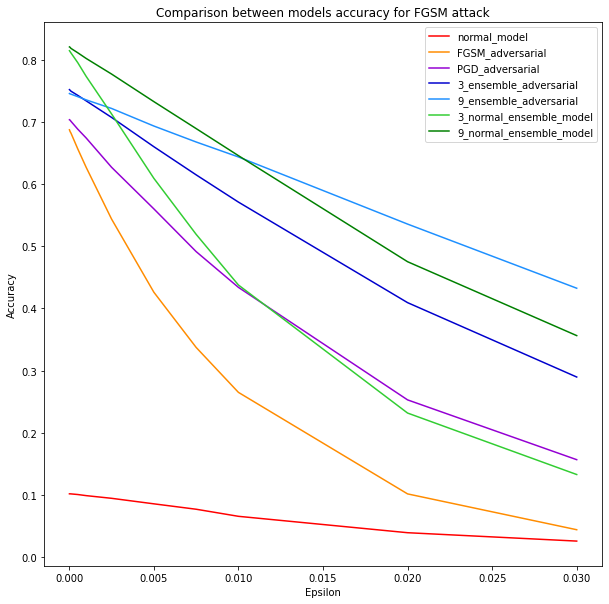

In [ ]:
plt.figure(figsize=(10,10))
colors = ['red', 'darkorange', 'darkviolet','mediumblue',"dodgerblue",'limegreen','green']
i = 0
for key in score.keys():
  plt.plot(eps,score[key],label=key,c=colors[i])
  i += 1
plt.title('Comparison between models accuracy for FGSM attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()

In [ ]:
eps = [0.00001, 0.00005,0.0001, 0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]    # Epsilon < (8/256) = 0.03125

models = {}
#models["5_ensemble_adversarial"] = ensemble_models[:5]
#models["7_ensemble_adversarial"] = ensemble_models[:7]
models["5_normal_ensemble_model"] = normal_ensemble_models[:5]
models["7_normal_ensemble_model"] = normal_ensemble_models[:7]


for key in models.keys():
  print(key)
  signed_grad_FGSM = []
  score_FGSM = []

  signed_grad_FGSM = ensemble_signed_gradient(models[key],test_images,y_test)
  for i in range(len(eps)):
    disturbed_images = test_images + eps[i]*signed_grad_FGSM
    prediction = ensemble_predictions(models[key],disturbed_images)
    score_FGSM.append(accuracy_score(test_labels, prediction))
  

  
  score[key] = score_FGSM.copy()


5_normal_ensemble_model
7_normal_ensemble_model


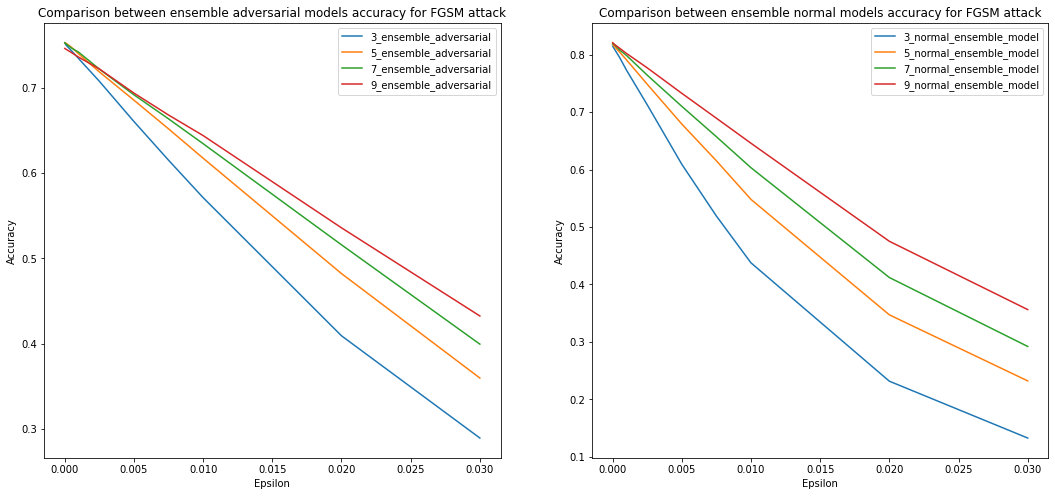

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(121)
for key in ['3_ensemble_adversarial','5_ensemble_adversarial','7_ensemble_adversarial','9_ensemble_adversarial',]:
  plt.plot(eps,score[key],label=key)
plt.title('Comparison between ensemble adversarial models accuracy for FGSM attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.subplot(122)
for key in ['3_normal_ensemble_model','5_normal_ensemble_model','7_normal_ensemble_model','9_normal_ensemble_model',]:
  plt.plot(eps,score[key],label=key)
plt.title('Comparison between ensemble normal models accuracy for FGSM attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()

In [ ]:
eps = [0.0005, 0.001,0.0025,0.005,0.0075,0.01,0.02,0.03]    # Epsilon < (8/256) = 0.03125
iterations = [3,4,5,6]

model =  keras.models.load_model('cifar10.h5')
models = {}
models['normal_model'] = model
models['FGSM_adversarial'] = adv_model_fgsm
models['PGD_adversarial'] = adv_model_pgd
models["3_ensemble_adversarial"] = ensemble_models[3:6]
models["9_ensemble_adversarial"] = ensemble_models
models["9_normal_ensemble_model"] = normal_ensemble_models

score = {}

for iteration in iterations[:2]:
  score[iteration] = {}
  for key in models.keys():
    print(key)
    signed_grad_FGSM = []
    score_FGSM = []

    if key == '3_ensemble_adversarial' or key == '9_normal_ensemble_model' or key == '9_ensemble_adversarial':
      
      for i in range(len(eps)):

        disturbed_images = ensemble_PGD_attack(models[key],test_images,iteration,eps[i],0.031,y_test)
        prediction = ensemble_predictions(models[key],disturbed_images)
        score_FGSM.append(accuracy_score(test_labels, prediction))
    
    else :

      for i in range(len(eps)):
        disturbed_images,_ = adversarial_set(models[key],test_images,y_test,1.0,'PGD',epsilon = eps[i],eta=0.031,iterations=iteration)
        prediction = models[key].predict(disturbed_images)
        acc = np.array(categorical_accuracy(prediction,y_test)*1)
        score_FGSM.append(acc)
    
    score[iteration][key] = score_FGSM.copy()


normal_model
FGSM_adversarial
PGD_adversarial
3_ensemble_adversarial
9_ensemble_adversarial
9_normal_ensemble_model
normal_model
FGSM_adversarial
PGD_adversarial
3_ensemble_adversarial
9_ensemble_adversarial
9_normal_ensemble_model


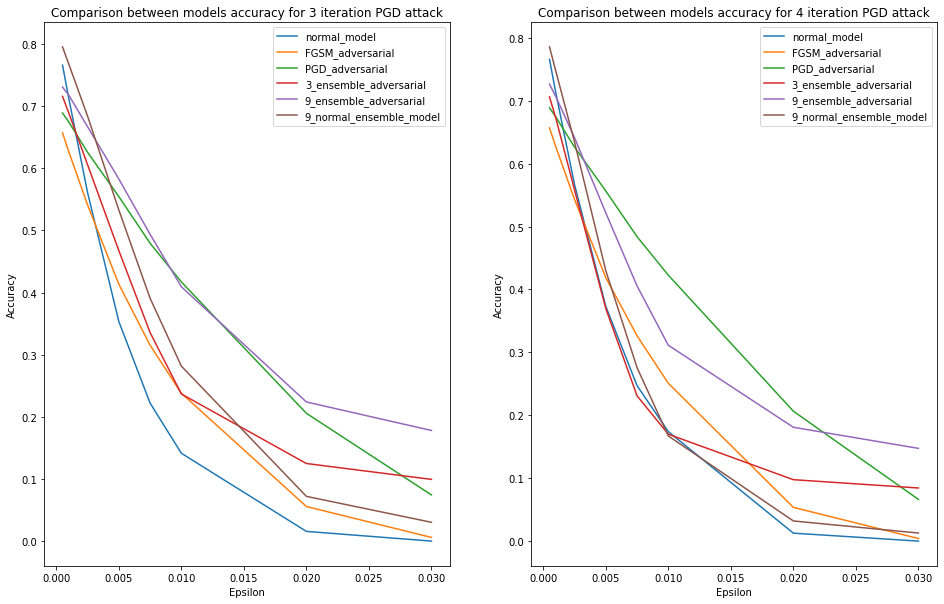

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(121)
for key in score[3].keys():
  plt.plot(eps,score[3][key],label=key)
plt.title('Comparison between models accuracy for 3 iteration PGD attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.subplot(122)
for key in score[4].keys():
  plt.plot(eps,score[4][key],label=key)
plt.title('Comparison between models accuracy for 4 iteration PGD attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()

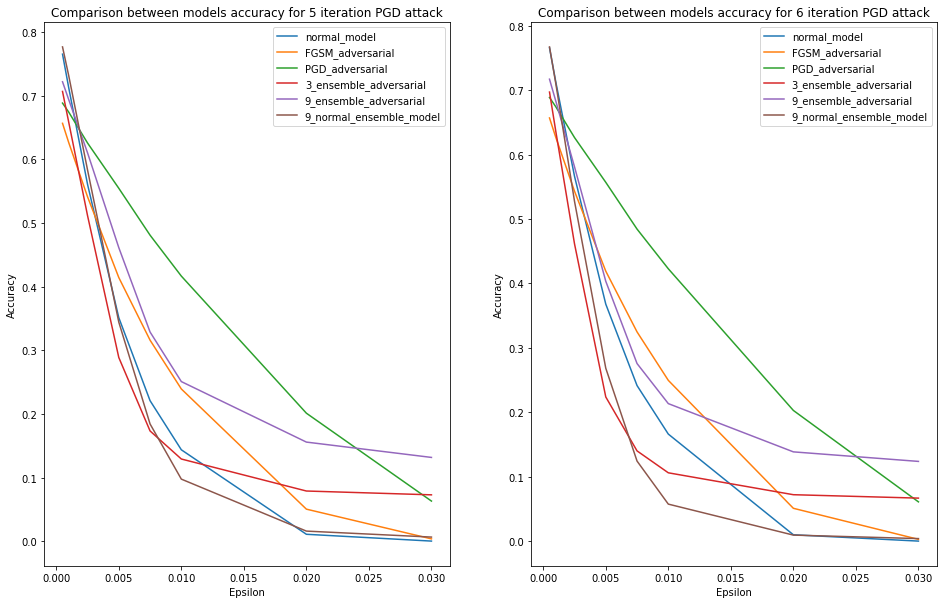

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(121)
for key in score[5].keys():
  plt.plot(eps,score[5][key],label=key)
plt.title('Comparison between models accuracy for 5 iteration PGD attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.subplot(122)
for key in score[6].keys():
  plt.plot(eps,score[6][key],label=key)
plt.title('Comparison between models accuracy for 6 iteration PGD attack')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.legend(loc='upper right')
plt.show()